Question 1

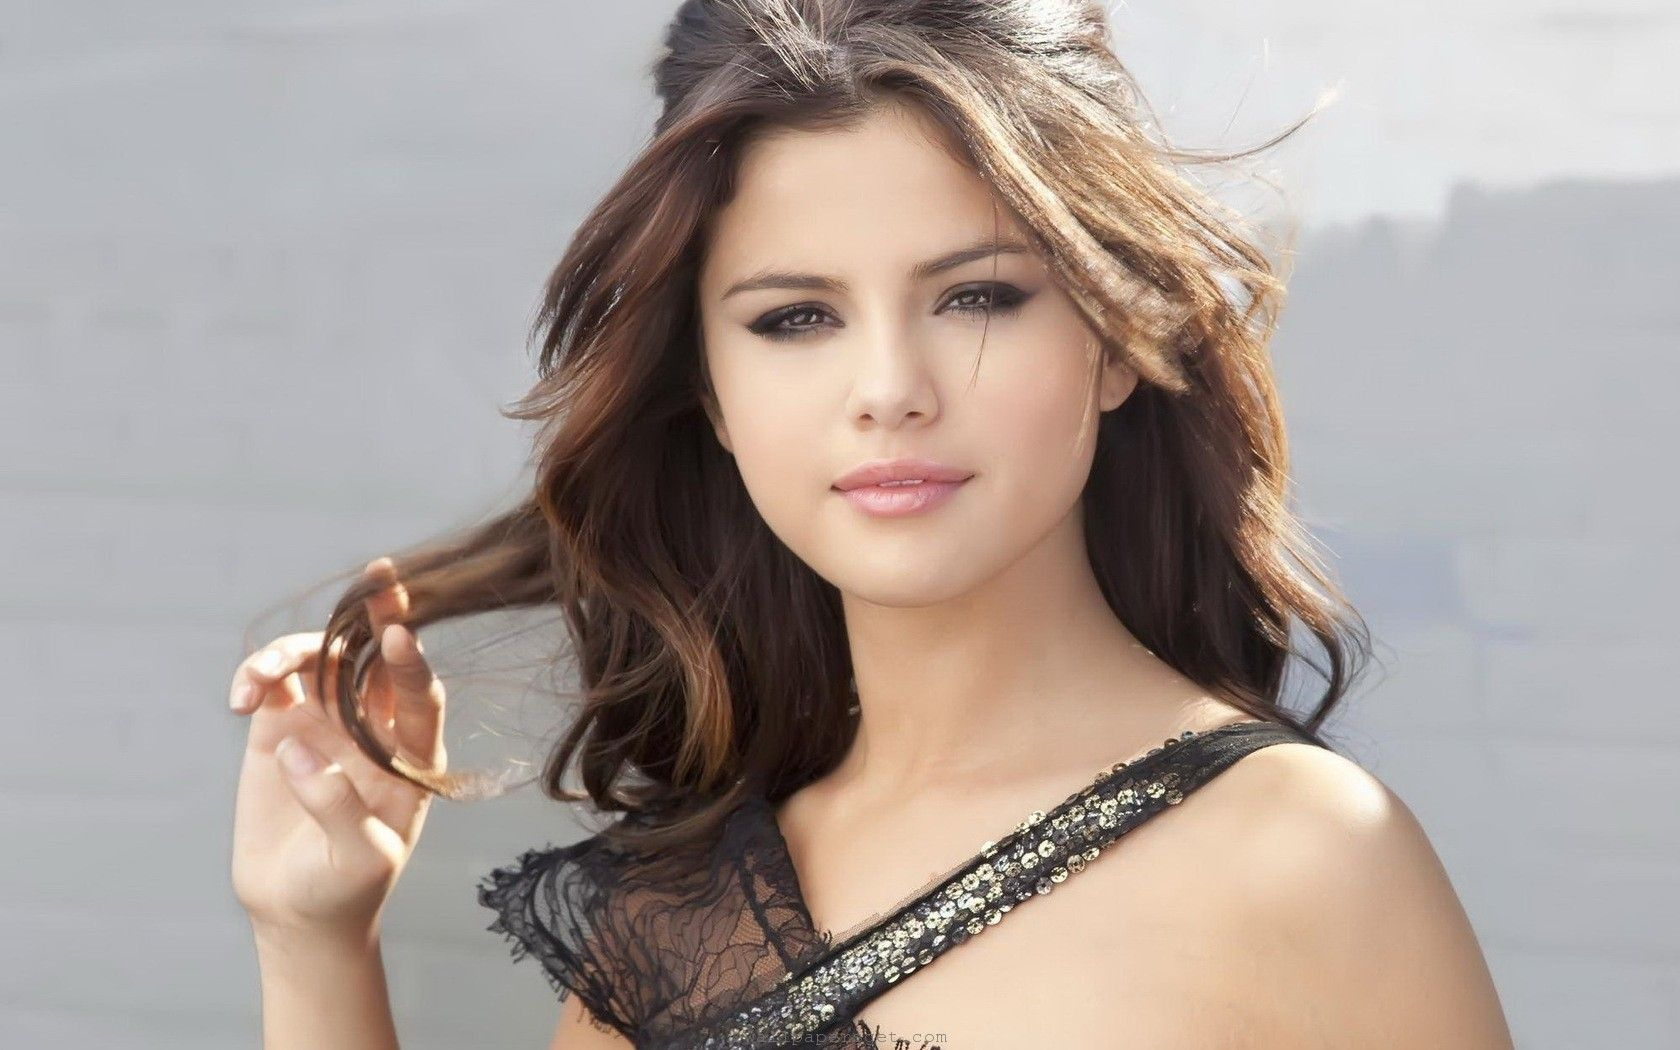

In [140]:
import numpy as np
import urllib.request
import cv2
from google.colab.patches import cv2_imshow
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image
img_link="https://wallpaperaccess.com/full/945375.jpg"
img=url_to_image(img_link)
cv2_imshow(img)



Question 1 


In [133]:
print(img.shape)

(512, 512, 3)


Question 2(A)


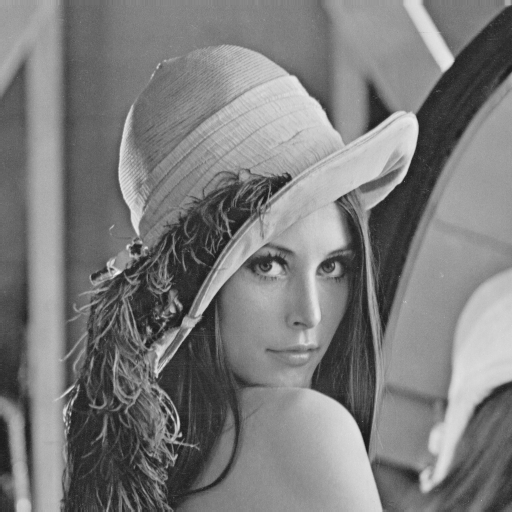

In [134]:
img=url_to_image(img_link)
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
cv2_imshow(grey_img)

Question 2(B)

In [135]:
img=url_to_image(img_link)
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
h1,w1=grey_img.shape
h2,w2,_=img.shape
for i in range (min(h1,h2)):
  for j in range (min(w1,w2)):
    if grey_img[i,j]==6 and  img[i,j,0]==6 and img[i,j,1]==6 and  img[i,j,2]==6:
      print(i,j)


Question 2(C)

In [136]:
img=url_to_image(img_link)
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
h1,w1=grey_img.shape
h2,w2,_=img.shape
dark1=500
x,y=(0,0)
for i in range (h1):
  for j in range (w1):
    if grey_img[i,j]<dark1:
      dark1=grey_img[i,j]
      x=i
      y=j
print(x,y)

71 508


Question 2(D)

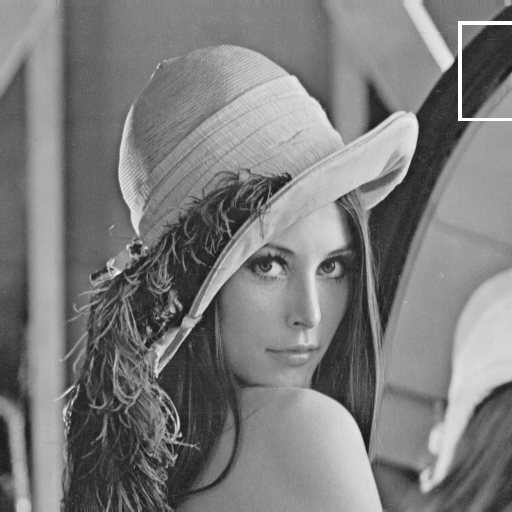

In [137]:
img=url_to_image(img_link)
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
for i in range(-50,50):
  for j in range(-50,50):
    try:
      if (i>=-50 and i<=-47) or (i>=47 and i<=50) or (j>=-50 and j<=-47) or (j>=47 and j<=50):
        grey_img[x+i][y+j]=255
    except:
      pass
cv2_imshow(grey_img)

Question 2(E)

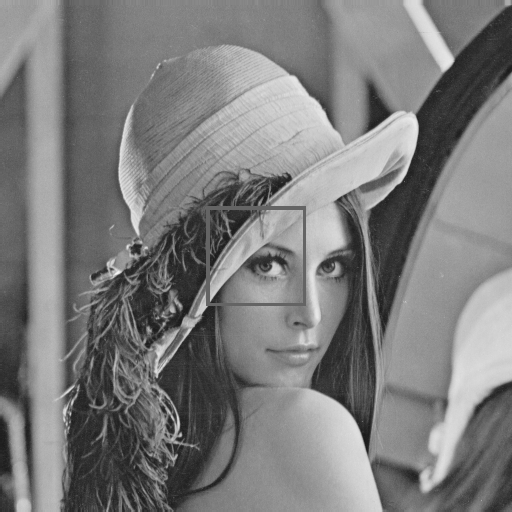

In [138]:
img=url_to_image(img_link)
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
h1,w1=grey_img.shape
x1,y1=(int(h1/2),int(w1/2))
for i in range(-50,50):
  for j in range(-50,50):
    try:
       if (i>=-50 and i<=-47) or (i>=47 and i<=50) or (j>=-50 and j<=-47) or (j>=47 and j<=50):
         grey_img[x1+i,y1+j]=100
    except:
      pass
cv2_imshow(grey_img)

Question 3

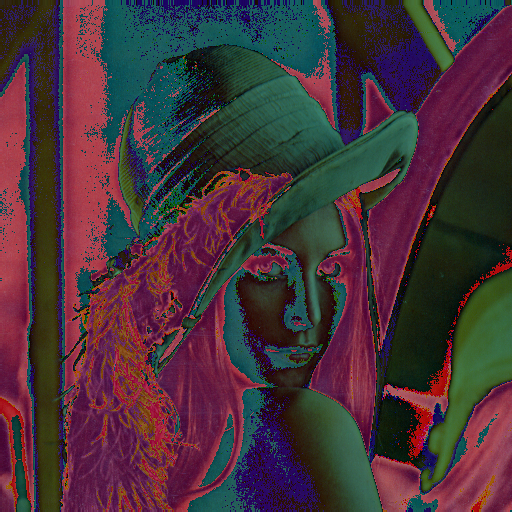

In [116]:
img=url_to_image(img_link) 
h,w,_=img.shape
avgB=0
avgG=0
avgR=0
for i in range(h):
  for j in range(w):
    avgB+=(img[i,j,0]/(h*w))
    avgG+=(img[i,j,1]/(h*w))
    avgR+=(img[i,j,2]/(h*w))
for i in range(h):
  for j in range(w):
    if img[i,j,0]-avgB>=0:
      img[i,j,0]-=avgB
    if img[i,j,1]-avgG>=0:
      img[i,j,1]-=avgG
    if img[i,j,2]-avgR>=0:
      img[i,j,2]-=avgR
cv2_imshow(img)


Question 4(A)

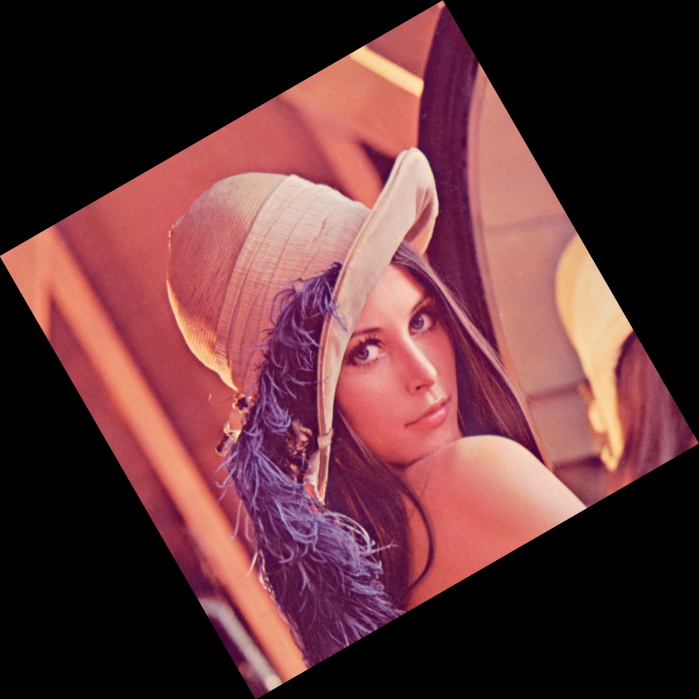

In [118]:
import math
def rotation(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))

    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR)
    return outImg
img=url_to_image(img_link) 
img=rotation(img,30)
cv2_imshow(img)

Question 4(B)

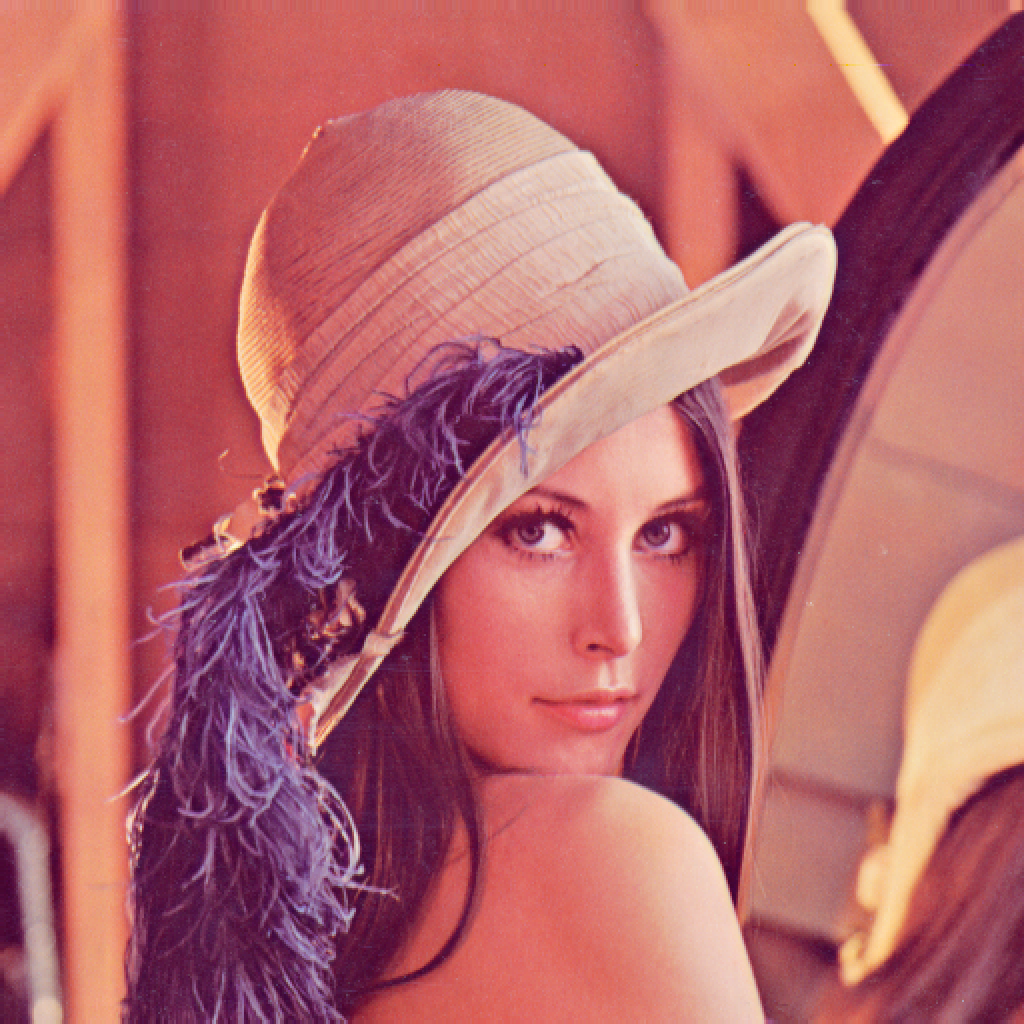

In [120]:
img=url_to_image(img_link) 
h,w,_=img.shape
nimg=np.zeros((2*h,2*w,3),dtype="uint8")
for i in range(2*h):
  for j in range(2*w):
    nimg[i,j]=img[int(i/2),int(j/2)]
cv2_imshow(nimg)

Question 4(C)

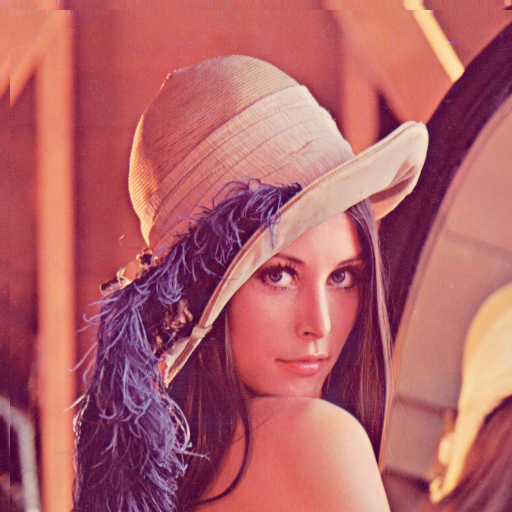

In [131]:
img=url_to_image(img_link) 
h,w,_=img.shape
newImg=np.zeros((h,w,3),dtype="uint8")
for i in range(h):
  for j in range(w):
    if i-10>=0 and j-10>=0:
      newImg[i,j]=img[i-10,j-10]
    else:
      newImg[i,j]=img[i,j]

cv2_imshow(newImg)


Question 4(D)

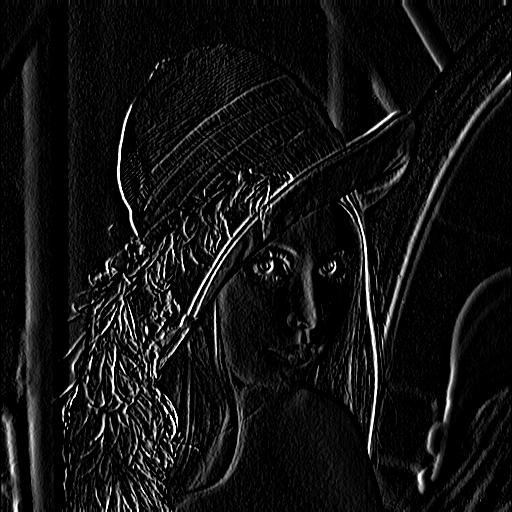

In [128]:
img=url_to_image(img_link) 
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
filter=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
img=cv2.filter2D(src=img, kernel=filter, ddepth=-1)
cv2_imshow(img)